# Customer Attrition

( Orginal data-source : https://www.kaggle.com/pavanraj159/telecom-customer-churn-prediction/data )

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
#Importing libraries
import numpy as np   # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt #visualization
%matplotlib inline

import seaborn as sns #visualization

import warnings
warnings.filterwarnings("ignore")
import io

In [2]:
telcom = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/Telco_Customer_Churn_1.csv")

#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# data overview

print ("Rows     : " , telcom.shape[0])
print ("Columns  : " , telcom.shape[1])
print ("\nFeatures : \n" , telcom.columns.tolist())

print ("\nMissing values :  ", telcom.isnull().sum().values.sum())

print ("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [24]:
# Q1> The no. of duplicate records in the churn dataframe based 
# on the customerID column are ?

# ans : 
print("No of CustomerID's : ",telcom["customerID"].shape[0])

print("No of Unique CustomerID's : ",telcom['customerID'].nunique())

print("No of Duplicate CustomerID's : ",telcom['customerID'].shape[0]-telcom['customerID'].nunique())



No of CustomerID's :  7043
No of Unique CustomerID's :  7043
No of Duplicate CustomerID's :  0


In [10]:
# Q2> In the churn dataset what are the total no. of 
# missing values for the variable TotalCharges ?

# ans : 

print("\n Missing values :", telcom["TotalCharges"].isnull().sum())


 Missing values : 0


In [12]:
# Q3> In the churn dataset , under the variable Dependents 
# how many records have "No" and "Yes" ?

countNo=0
countYes=0

for i in telcom["Dependents"] :
    if i == "No" :
        countNo +=1
    else :
        countYes +=1
print("countof ppl no  dependent",countNo)
print("countof ppl yes  dependent",countYes)


countof ppl no  dependent 4933
countof ppl yes  dependent 2110


In [15]:
# Q4> find top 5 customers with the highest total charges ?

print ("top 5 customers with the highest total charges :  ")

telcom.dropna(inplace = True) 
  
# extracting greatest 5 

telcom.sort_values("TotalCharges", ascending = False,inplace = True )
# display 
telcom.head()

top 5 customers with the highest total charges :  


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2845,9093-FPDLG,Female,0,No,No,11,Yes,No,Fiber optic,No,...,Yes,Yes,No,Yes,Month-to-month,Yes,Electronic check,94.20,999.9,No
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No


In [21]:
# Q5> Count of Customers paying higher than the average monthly charge ? 

print ("Count of Customers paying higher than the average monthly charge:  ")

 
# first, find avg or mean monthly charge 

Avg_Monthly=telcom["MonthlyCharges"].mean()

# Second, find Customers paying higher than average     

tempDF = telcom[telcom.MonthlyCharges > Avg_Monthly]

# display findings 
print("Average monthly charge : ",Avg_Monthly)
print("Customers paying higher than average : ",tempDF['customerID'].count())


Count of Customers paying higher than the average monthly charge:  
Average monthly charge :  64.76169246059918
Customers paying higher than average :  3923


In [9]:
# Q6> What's the difference between monthly charge for 
# customer with highest tenure to the average monthly charge ?

# first, find the average monthly charge
AvgMonthlyCharge = telcom['MonthlyCharges'].mean()

# then, find the customer/'s with highest tenure
telcom.sort_values("tenure", ascending = False, inplace = True) 
print(telcom.head(1)) # lets see the customer with highest tenure (=> tenure is in no. of weeks)
print("-----------------------------------------------------")

# finally, calculate the difference 
delta = telcom.head(1).MonthlyCharges -  AvgMonthlyCharge
print(delta)
print("-----------------------------------------------------")

# to print the above o/p without index
# Note : delta above is a series
print("difference between monthly charge for customer with highesh tenure to the average monthly charge ")
print(delta.to_string(index=False))

      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
6661  3704-IEAXF  Female              0     Yes        Yes      72   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
6661           No  No phone service             DSL             No  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies  Contract  \
6661               No         Yes         Yes             Yes  Two year   

     PaperlessBilling            PaymentMethod MonthlyCharges  TotalCharges  \
6661               No  Credit card (automatic)          53.65          3784   

     Churn  
6661    No  

[1 rows x 21 columns]
-----------------------------------------------------
6661   -11.111692
Name: MonthlyCharges, dtype: float64
-----------------------------------------------------
difference between monthly charge for customer with highesh tenure to the average monthly charge 
-11.111692


More Questions from NPTEL course : "Python for Data Science"
--

**Retrying similar questions on Telco_Customer_Churn_2.csv and some more datasets** 

**(used in NPTEL course : "Python for Data Science")**

In [27]:
# Retrying above questions on Telco_Customer_Churn_2.csv (used in NPTEL course : "Python for Data Science")
telcom_2 = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/Telco_Customer_Churn_2.csv")

#first few rows
telcom_2.head()

,Unnamed: 0,customerID,tenure,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,1,8260-NGFNY,One,Month-to-month,No,Mailed check,25.2,25.20,Female,0.0,...,No,No phone service,DSL,No,No,No,No,No,No,Yes
1,2,2359-QWQUL,39,One year,Yes,Credit card (automatic),104.7,4134.85,Female,0.0,...,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Yes
2,3,6598/RFFVI,2,One year,No,Credit card (automatic),19.3,28.30,Male,0.0,...,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Yes
3,4,IXSTS-8780,6,Month-to-month,Yes,Electronic check,90.1,521.30,Female,0.0,...,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes
4,5,2674/MIAHT,Four,Month-to-month,Yes,Mailed check,80.3,324.20,Female,0.0,...,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,No


In [28]:
# data overview

print ("Rows     : " , telcom_2.shape[0])
print ("Columns  : " , telcom_2.shape[1])
print ("\nFeatures : \n" , telcom_2.columns.tolist())

print ("\nMissing values :  ", telcom_2.isnull().sum().values.sum())

print ("\nUnique values :  \n",telcom_2.nunique())

Rows     :  257
Columns  :  22

Features : 
 ['Unnamed: 0', 'customerID', 'tenure', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

Missing values :   30

Unique values :  
 Unnamed: 0          257
customerID          250
tenure               71
Contract              3
PaperlessBilling      2
PaymentMethod         4
MonthlyCharges      214
TotalCharges        234
gender                2
SeniorCitizen         2
Partner               2
Dependents            3
PhoneService          2
MultipleLines         3
InternetService       3
OnlineSecurity        3
OnlineBackup          3
DeviceProtection      3
TechSupport           3
StreamingTV           3
StreamingMovies       3
Churn                 2
dtype: int64


In [30]:
# Q1> The no. of duplicate records in the churn dataframe based 
# on the customerID column are ?

# ans : 

print("No of CustomerID's : ",telcom_2["customerID"].shape[0])

print("No of Unique CustomerID's : ",telcom_2['customerID'].nunique())

print("No of Duplicate CustomerID's : ",telcom_2['customerID'].shape[0]-telcom_2['customerID'].nunique())



No of CustomerID's :  257
No of Unique CustomerID's :  250
No of Duplicate CustomerID's :  7


In [31]:
# Q2> In the churn dataset what are the total no. of 
# missing values for the variable TotalCharges ?

# ans : 

print("\n Missing values :", telcom_2["TotalCharges"].isnull().sum())



 Missing values : 15


In [33]:
# Q3> In the churn dataset , under the variable Dependents 
# how many records have "1@#" ?
count=0

for i in telcom_2["Dependents"] :
    if i == "1@#" :
        count +=1

print("count------>>>",count)
# Q3> In the churn dataset , under the variable Dependents 
# how many records have "No" and "Yes" ?

countNo=0
countYes=0

for i in telcom_2["Dependents"] :
    if i == "No" :
        countNo +=1
    else :
        countYes +=1
print("countof ppl no  dependent",countNo)
print("countof ppl yes  dependent",countYes)



count------>>> 6
countof ppl no  dependent 171
countof ppl yes  dependent 86


Q4> The command to replace ‘Four’ by 4 and ‘One’ by 1 under the variable “tenure” of the churn dataframe is ? ( refering churn data set)

a> pandas.Dataframe.where()

b> pandas.Dataframe.replace()

c> numpy.where()

d> all the above

In [41]:
# ans : 
tempdf=telcom_2["tenure"]
tempdf=tempdf.replace(to_replace ="Four",value =4) 
tempdf=tempdf.replace(to_replace ="One",value =1)
tempdf.head()

0     1
1    39
2     2
3     6
4     4
Name: tenure, dtype: object

In [17]:
# Now replace 'Four' with '4' and 'One' with '1'
tempDf = tempDf.replace(to_replace ="Four", value ="4")
tempDf = tempDf.replace(to_replace ="One", value ="1")
tempDf.head(10)

0     1
1    39
2     2
3     6
4     4
5     3
6    70
7    42
8    70
9     1
Name: tenure, dtype: object

**Solve few questions on Cars dataset called mtcar.csv**

Q5> From the given dataset 'mtcars.csv
(https://drive.google.com/file/d/1Ua21bZfbtN4DUw4fK9XCF3AJmcIqSn4w/view?
usp=sharing)', plot a histogram to check the frequency distribution of the variable 'mpg' (Miles per gallon). 
The interval having the highest frequency is :

a> 10 to 15

b> 15 to 20

c> 25 to 30

d> 30 to 35

In [42]:
# first , get the overview of data
cars = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/mtcars.csv")

#first few rows
cars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [43]:
cars.shape

(32, 12)

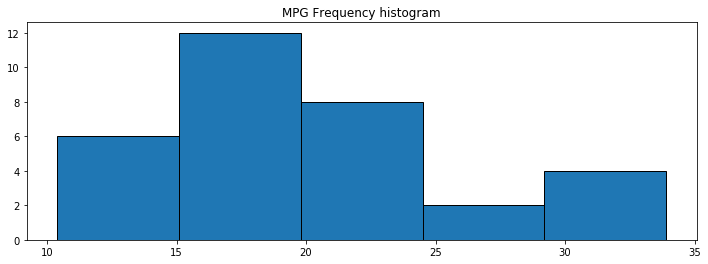

In [46]:
# plotting the histogram
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,4))

ax.hist(cars['mpg'], bins=5, edgecolor='k')
ax.set_title('MPG Frequency histogram');    # ans : option b> 15-20

Q6> Which of the following can be inferred from scatter plot of ‘mpg’ (Miles per gallon) vs ‘wt’(Weight of car) from the dataset mtcars.csv ?

a> As weight of the car increases, the mpg decreases

b> As weight of the car increases, the mpg increases

c> There is no relation between weight of the car and mpg

d> When weight increases, mpg increases exponentially

Text(0, 0.5, 'fuel efficiency')

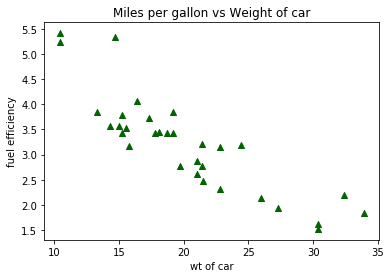

In [51]:
# make a scatter plot of mpg vs. wt

plt.scatter(cars["mpg"], cars["wt"], color="darkgreen",marker='^')
plt.title("Miles per gallon vs Weight of car")
plt.xlabel("wt of car")
plt.ylabel("fuel efficiency")


**Solve few questions on Diamond dataset called diamond.csv**

Q7> Plot a boxplot for “price” vs “cut” from the dataset “diamond.csv
(https://drive.google.com/file/d/1oSRxlHG8NcK9jNgIn4Q1Y5GGi6Jm5asX/view?
usp=sharing)”. 

Which of the categories under “cut” have the highest median price?

a> Good

b> Very Good

c> Premium

d> Fair

In [52]:
# first , get the overview of data
diamonds = pd.read_csv("C:\Program Files/Python36/suven/Data Anaylsis/Dataset/diamond.csv")

#first few rows
diamonds.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [53]:
diamonds.shape

(53940, 11)

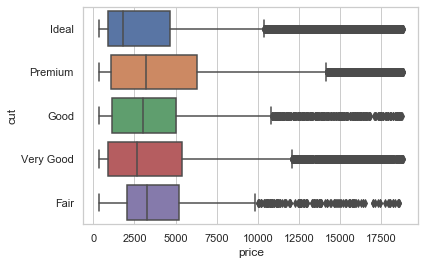

In [54]:
# lets Plot a boxplot for “price” vs “cut” using seaborn library
# Note : don't use MatplotLib for plotting 2 varible Boxplot. its very clumsy coding

import seaborn as sns
sns.set(style="whitegrid")
ax = sns.boxplot(x=diamonds["price"], y=diamonds["cut"])   # ans : premium

# reference : https://seaborn.pydata.org/generated/seaborn.boxplot.html

Q8> Create a **frequency table** (one-way table) for the variable “cut” from the dataset “diamond.csv”. What is the frequency for the cut type “Ideal”?

a> 13791

b> 12082

c> 21552

d> 21551

In [93]:
cut_series = diamonds['cut']
counts = cut_series.value_counts()
print(counts)   # ans : 21551  , option d

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64


------------------- Assignment Ends here -----------------------------
--